In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [3]:
file = 'german.data'

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

german_credit = pd.read_csv(file,names = names, delimiter=' ')
print(german_credit.shape)
print (german_credit.columns)
german_credit.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
german_credit.isna().sum()

existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
classification           0
dtype: int64

In [5]:
# Binarize the y output for easier use
german_credit.classification.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
german_credit.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [6]:
#numerical variables labels
numvar = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(german_credit[numvar].drop(['classification'], axis=1)))

# Encoding Categorical Feature

In [7]:
#Labelencoding to transform categorical to numerical, Enables better Visualization than one hot encoding

from collections import defaultdict

#categorical variables labels
catvar = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

e = defaultdict(LabelEncoder)

# Encoding the variable
encdata = german_credit[catvar].apply(lambda x: e[x.name].fit_transform(x))

# print transformations
for x in range(len(catvar)):
    print(catvar[x],": ", german_credit[catvar[x]].unique())
    print(catvar[x],": ", encdata[catvar[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvar = pd.get_dummies(german_credit[catvar])

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Concate Transformed Dataset

In [8]:
cleaned_data = pd.concat([german_credit[numvar], dummyvar], axis = 1)

print(cleaned_data.shape)

(1000, 62)


## Split Training Dataset

In [9]:
from sklearn.model_selection import train_test_split

X_clean = cleaned_data.drop('classification', axis=1)
y_clean = cleaned_data['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.15, random_state=1)

## Classification : Models

The following classifiers are implemented in the next part:
* K Nearest Neighbor
* Linear SVM
* Logistic Regression
* Kernalized SVM
* Decision Tree    


Here, we are considering AUC-ROC score for evaluation as the goal of AUC is to deal with situations where you have a very skewed sample distribution, and don't want to overfit to a single class. 

### K Nearest Neighbor Classifier

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Grid Search Cross-Validation for hyperparameter tuning

param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='roc_auc')
grid_knn.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [11]:
print("KNN Training Score: ",grid_knn.score(X_train_clean, y_train_clean))

KNN Training Score:  0.8022446229456217


In [12]:
print("KNN Testing Score: ", grid_knn.score(X_test_clean, y_test_clean))

KNN Testing Score:  0.5052257525083612


In [13]:
print("Best Parameters for KNN: ", grid_knn.best_params_)

Best Parameters for KNN:  {'n_neighbors': 5}


In [14]:
print("KNN Mean Test Scores: ",grid_knn.cv_results_['mean_test_score'])

KNN Mean Test Scores:  [0.56832649 0.56980225 0.57253563 0.56871726 0.56758905 0.56525788
 0.56678767 0.55570909 0.55014684]


In [15]:
y_knn_predict = grid_knn.predict(X_test_clean)
y_knn_train_predict = grid_knn.predict(X_train_clean)

In [16]:
from sklearn.metrics import roc_auc_score
print('Train ROC AUC Score: %.2f'%roc_auc_score(y_knn_train_predict, y_train_clean))
print('Test ROC AUC Score: %.2f '%roc_auc_score(y_knn_predict, y_test_clean))

Train ROC AUC Score: 0.71
Test ROC AUC Score: 0.51 


In [17]:
train_score_list = []
test_score_list = []
x_range = [3, 4, 5, 6, 7, 8, 9, 10, 15]

for alpha in x_range: 
    model = KNeighborsClassifier(n_neighbors=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))   

Text(0.5, 0, 'n_neighbors')

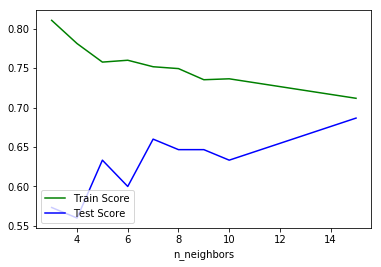

In [18]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 3)
plt.xlabel(r'n_neighbors')

In [19]:
report_table = [['KNN', 'K = 5', grid_knn.score(X_train_clean, y_train_clean), 
                 grid_knn.score(X_test_clean, y_test_clean), roc_auc_score(y_true=y_train_clean, y_score=y_knn_train_predict),
                 roc_auc_score(y_true=y_test_clean, y_score=y_knn_predict) ]]

In [20]:
report_table

[['KNN',
  'K = 5',
  0.8022446229456217,
  0.5052257525083612,
  0.6622628547270517,
  0.5052257525083612]]

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid_log_reg.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\s

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train_clean, y_train_clean))

Logistic Regression Training Score:  0.7870588235294118


In [23]:
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test_clean, y_test_clean))

Logistic Regression Testing Score:  0.7733333333333333


In [ ]:
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)

Best Parameters for Logistic Regression:  {'C': 100}


In [ ]:
print("Logistic Regression Mean Test Scores: ", grid_log_reg.cv_results_['mean_test_score'])

Logistic Regression Mean Test Scores:  [0.70941176 0.71764706 0.74       0.74470588 0.74470588 0.74588235]


In [ ]:
y_log_predict_train = grid_log_reg.predict(X_train_clean)
y_log_predict = grid_log_reg.predict(X_test_clean)

In [ ]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

Text(0.5, 0, 'C')

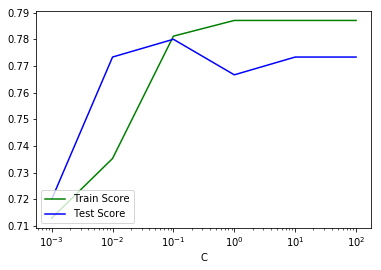

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [ ]:
report_table = report_table + [['Logistic Regression', 'C = 10', grid_log_reg.score(X_train_clean, y_train_clean),
                                grid_log_reg.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_log_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_log_predict, y_true=y_test_clean)]]

### Linear SVM 

In [ ]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear f

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
print("Linear SVC Training Score: ", grid_svc_lin.score(X_train_clean, y_train_clean))

Linear SVC Training Score:  0.5246393278021455


In [ ]:
print("Linear SVC Testing Score: ",grid_svc_lin.score(X_test_clean, y_test_clean))

Linear SVC Testing Score:  0.534489966555184


In [ ]:
print("Best Parameters for Linear SVC: ", grid_svc_lin.best_params_)

Best Parameters for Linear SVC:  {'C': 0.01}


In [ ]:
print("Linear SVC Mean Test Scores: ", grid_svc_lin.cv_results_['mean_test_score'])

Linear SVC Mean Test Scores:  [0.59254623 0.6022837  0.59977794 0.59042827 0.59964422 0.57332424]


In [ ]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train_clean)
y_svc_lin_predict = grid_svc_lin.predict(X_test_clean)

In [ ]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LinearSVC(C=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear f

Text(0.5, 0, 'C')

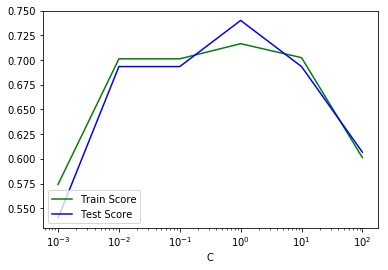

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [ ]:
report_table = report_table + [['LinearSVC', 'C = 0.1', grid_svc_lin.score(X_train_clean, y_train_clean),
                                grid_svc_lin.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_svc_lin_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_svc_lin_predict, y_true=y_test_clean)]]

In [ ]:
report_table

[['KNN',
  'K = 5',
  0.8022446229456217,
  0.5052257525083612,
  0.6622628547270517,
  0.5052257525083612],
 ['Logistic Regression',
  'C = 10',
  0.7870588235294118,
  0.7733333333333333,
  0.7171233419648047,
  0.6849916387959866],
 ['LinearSVC', 'C = 0.1', 0.5246393278021455, 0.534489966555184, 0.5, 0.5]]

###  Kernelized SVM

In [ ]:
from sklearn.svm import SVC
kernel_linear = SVC(kernel='linear')
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_linear = GridSearchCV(kernel_linear, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_linear.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
print("Linear Kernalized SVM Training Score: ", grid_kernel_linear.score(X_train_clean, y_train_clean))

Linear Kernalized SVM Training Score:  0.8309398615441526


In [ ]:
print("Linear Kernalized SVM Testing Score: ", grid_kernel_linear.score(X_test_clean, y_test_clean))

Linear Kernalized SVM Testing Score:  0.7782190635451505


In [ ]:
print("Best Parameters for Linear Kernalized SVM: ", grid_kernel_linear.best_params_)

Best Parameters for Linear Kernalized SVM:  {'C': 0.1}


In [ ]:
print("Linear Kernalized SVM Mean Test Scores: ", grid_kernel_linear.cv_results_['mean_test_score'])

Linear Kernalized SVM Mean Test Scores:  [0.76133773 0.76384414 0.78121035 0.76182364 0.76557792 0.76494072]


In [ ]:
y_ker_lin_predict_train = grid_kernel_linear.predict(X_train_clean)
y_ker_lin_predict = grid_kernel_linear.predict(X_test_clean)

In [ ]:
# from sklearn.svm import SVC
# train_score_list = []
# test_score_list = []
# x_range = [0.001, 0.01, 0.1, 1, 10, 100]

# for alpha in x_range: 
#     model = SVC(kernel='linear', C = alpha, verbose=True)
#     model.fit(X_train_clean,y_train_clean)
#     train_score_list.append(model.score(X_train_clean,y_train_clean))
#     test_score_list.append(model.score(X_test_clean, y_test_clean))

In [ ]:
# plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
# plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
# plt.xscale('log')
# plt.legend(loc = 3)
# plt.xlabel('C')

In [ ]:
report_table = report_table + [['Linear Kernelized SVM', 'C = 1', grid_kernel_linear.score(X_train_clean, y_train_clean),
                                grid_kernel_linear.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_lin_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_ker_lin_predict, y_true=y_test_clean)]]

In [ ]:
kernel_rbf = SVC(kernel='rbf', gamma=0.7)

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_rbf = GridSearchCV(kernel_rbf, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_rbf.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.7,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
print("Rbf Kernalized SVM Training Score: ", grid_kernel_rbf.score(X_train_clean, y_train_clean))

Rbf Kernalized SVM Training Score:  1.0


In [ ]:
print("Rbf Kernalized SVM Testing Score: ", grid_kernel_rbf.score(X_test_clean, y_test_clean))

Rbf Kernalized SVM Testing Score:  0.4776337792642141


In [ ]:
print("Best Parameters for Rbf Kernalized SVM: ", grid_kernel_rbf.best_params_)

Best Parameters for Rbf Kernalized SVM:  {'C': 0.001}


In [ ]:
print("Rbf Kernalized SVM Mean Test Scores: ", grid_kernel_rbf.cv_results_['mean_test_score'])

Rbf Kernalized SVM Mean Test Scores:  [0.49892626 0.49559649 0.49382185 0.49884109 0.49660721 0.49660721]


In [ ]:
y_ker_rbf_predict_train = grid_kernel_rbf.predict(X_train_clean)
y_ker_rbf_predict = grid_kernel_rbf.predict(X_test_clean)

In [ ]:
#train_score_list = []
#test_score_list = []
#x_range = [0.001, 0.01, 0.1, 1, 10, 100]

#for alpha in x_range: 
#    model = SVC(kernel='rbf', C = alpha, gamma = 0.7)
#    model.fit(X_train_clean,y_train_clean)
#    train_score_list.append(model.score(X_train_clean,y_train_clean))
#    test_score_list.append(model.score(X_test_clean, y_test_clean))

In [ ]:
#plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
#plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.legend(loc = 3)
#plt.xlabel('C')

In [ ]:
report_table = report_table + [['Rbf Kernelized SVM', 'C = 0.001', grid_kernel_rbf.score(X_train_clean, y_train_clean),
                               grid_kernel_rbf.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_rbf_predict_train, y_true=y_train_clean),
                               roc_auc_score(y_score=y_ker_rbf_predict, y_true=y_test_clean)]]

In [ ]:
kernel_poly = SVC(kernel='poly', degree=3)

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_poly = GridSearchCV(kernel_poly, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_poly.fit(X_train_clean, y_train_clean)

In [ ]:
print("Poly Kernalized SVM Training Score: ", grid_kernel_poly.score(X_train_clean, y_train_clean))

In [ ]:
print("Poly Kernalized SVM Testing Score: ", grid_kernel_poly.score(X_test_clean, y_test_clean))

In [ ]:
print("Best Parameters for Poly Kernalized SVM: ", grid_kernel_poly.best_params_)

In [ ]:
print("Poly Kernalized SVM Mean Test Scores: ", grid_kernel_poly.cv_results_['mean_test_score'])

In [ ]:
y_ker_poly_predict_train = grid_kernel_poly.predict(X_train_clean)
y_ker_poly_predict = grid_kernel_poly.predict(X_test_clean)

In [ ]:
#train_score_list = []
#test_score_list = []
#x_range = [0.001, 0.01, 0.1, 1, 10, 100]

#for alpha in x_range: 
#    model = SVC(kernel='poly', C = alpha, degree=3)
#    model.fit(X_train_clean,y_train_clean)
#    train_score_list.append(model.score(X_train_clean,y_train_clean))
#    test_score_list.append(model.score(X_test_clean, y_test_clean))

In [ ]:
#plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
#plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.legend(loc = 3)
#plt.xlabel('C')

In [ ]:
report_table = report_table + [['Poly Kernelized SVM', 'C = 0.1', grid_kernel_poly.score(X_train_clean, y_train_clean),
                               grid_kernel_poly.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_poly_predict_train, y_true=y_train_clean),
                              roc_auc_score(y_score=y_ker_poly_predict, y_true=y_test_clean)]]

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(5, 20)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv = 5, scoring='roc_auc', return_train_score=True)
grid_tree.fit(X_train_clean, y_train_clean)

In [ ]:
print("Decision Tree Training Score: ", grid_tree.score(X_train_clean, y_train_clean))

In [ ]:
print("Decision Tree Testing Score: ", grid_tree.score(X_test_clean, y_test_clean))

In [ ]:
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)

In [ ]:
print("Decision Tree Mean Test Scores: ", grid_tree.cv_results_['mean_test_score'])

In [ ]:
y_tree_predict_train = grid_tree.predict(X_train_clean)
y_tree_predict = grid_tree.predict(X_test_clean)

In [ ]:
train_score_list = []
test_score_list = []
x_range = np.arange(5, 20)

for alpha in x_range: 
    model = DecisionTreeClassifier(max_depth=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 1)
plt.xlabel('Max Depth')

In [ ]:
report_table = report_table + [['Decision Tree', 'd = 5', grid_tree.score(X_train_clean, y_train_clean),
                                grid_tree.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_tree_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_tree_predict, y_true=y_test_clean)]]

In [ ]:
main_report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameter', 'Training Accuracy',
                                              'Testing Accuracy', 'Training AUC score', 'Testing AUC score'])

In [ ]:
main_report.index = main_report['Model Name']

In [ ]:
main_report.head(10)

In [ ]:
graph = main_report[['Training Accuracy','Testing Accuracy','Training AUC score', 'Testing AUC score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(16, 10), fontsize = 7)
plt.show()